In [ ]:
#  Clickhouse (via Tabix) was used to solve the tasks.

In [ ]:
# LESSON 1 -- Intro to SQL

In [ ]:
# Show the first 10 rows.
SELECT 
  * 
FROM 
  checks 
LIMIT 
  10

In [ ]:
# Show top-10 values in Rub column. Sort them in descending order.
SELECT 
  * 
FROM 
  checks 
ORDER BY 
  Rub DESC 
LIMIT 
  10;

In [ ]:
# Show the first 15 rows of the table renaming Rub to Revenue 
# and sort the result by UserID (ascending order).
SELECT 
  Rub AS Revenue, 
  BuyDate, 
  UserID 
FROM 
  checks 
ORDER BY 
  UserID ASC 
LIMIT 
  15

In [ ]:
# Check the dates range we have in the checks table.
SELECT 
  MIN(BuyDate) AS MinDate, 
  MAX(BuyDate) AS MaxDate 
FROM 
  checks

In [ ]:
# Show 10 unique UserID's. Sort the results by UserID in ascending order.
SELECT 
  DISTINCT UserID 
FROM 
  checks 
ORDER BY 
  UserID ASC 
LIMIT 
  10

In [ ]:
# Show the sales data: orders purchased on the 8th of March 2019.
# Sort the results by Rub in descending order. Limit the data to the first 10 rows.
SELECT 
  * 
FROM 
  checks 
WHERE 
  BuyDate IN ('2019-03-08') 
ORDER BY 
  Rub DESC 
LIMIT 
  10

In [ ]:
# Show unique UserID's for buyers made purchase on the 1st of September 2019
# and their expenditures were higer than 2000 rubles.
# Sort the resul by UserID in descending order.
SELECT 
  DISTINCT UserID 
FROM 
  checks 
WHERE 
  (
    BuyDate = '2019-09-01' 
    AND Rub > 2000
  ) 
ORDER BY 
  UserID DESC

In [ ]:
# LESSON 2 -- Grouping and Aggregate

In [ ]:
# Count number of purchases per each client, name the column as NumChecks.
# Sort the result by NumChecks in descending order. Limit output to 10 rows.
SELECT 
  UserID, 
  COUNT(Rub) AS NumChecks 
FROM 
  checks 
GROUP BY 
  UserID 
ORDER BY 
  NumChecks DESC 
LIMIT 
  10

In [ ]:
# Count sum of purchases made by each client, name the column as Revenue.
# Sort the result by Revenue in descending order. Limit output to 10 rows.
SELECT 
  UserID, 
  COUNT(Rub) AS NumChecks, 
  SUM(Rub) AS Revenue 
FROM 
  checks 
GROUP BY 
  UserID 
ORDER BY 
  Revenue DESC 
LIMIT 
  10

In [ ]:
# Count by date min, max and average money spent.
# Use sort by BuyDate in descending order. Limit output ot 10 rows.
SELECT 
  BuyDate, 
  MIN(Rub) AS MinCheck, 
  MAX(Rub) AS MaxCheck, 
  AVG(Rub) AS AvgCheck 
FROM 
  checks 
GROUP BY 
  BuyDate 
ORDER BY 
  BuyDate DESC 
LIMIT 
  10

In [ ]:
# Find customers who has spent more than 10000 rubles.
# Sort the result by UserID in descending order. Limit output to 10 rows.
SELECT 
  UserID, 
  SUM(Rub) AS Revenue 
FROM 
  checks 
GROUP BY 
  UserID 
HAVING 
  Revenue > 10000 
ORDER BY 
  UserID DESC 
LIMIT 
  10

In [ ]:
# Count Revenue by country. Sort the result by Revenue in descenig order.
# Limit output to 10 rows.
SELECT 
  Country, 
  SUM(Quantity * UnitPrice) AS Revenue 
FROM 
  default.retail 
GROUP BY 
  Country 
ORDER BY 
  Revenue DESC 
LIMIT 
  10

In [ ]:
# Count average number of purchases and an average price of a unit.
# Group the result by country and sort it by an average price of a unit 
# in descending order. Do not include purchases having "Manual" in Description.
SELECT 
  Country, 
  AVG(UnitPrice), 
  AVG(Quantity) 
FROM 
  default.retail 
WHERE 
  Description != 'Manual' 
GROUP BY 
  Country 
ORDER BY 
  AVG(UnitPrice) DESC

In [ ]:
# Calculate Revenue by month. Sort the result by Revenue in descending order.
# Do not include purchases having "Manual" in Description.
SELECT 
  toStartOfMonth(InvoiceDate) AS month, 
  SUM(UnitPrice * Quantity) AS revenue 
FROM 
  default.retail 
WHERE 
  Description != 'Manual' 
GROUP BY 
  month 
ORDER BY 
  revenue DESC

In [ ]:
# Calculate an average price of a unit bought in march 2011.
# Group the results by CustomerID and sort it by an average price of a unit in
# descending order. Do not include purchases having "Manual" in Description.
# Limit output to 10 rows.
SELECT 
  CustomerID, 
  AVG(UnitPrice) AS avg_purch_in_march 
FROM 
  default.retail 
WHERE 
  Description != 'Manual' 
GROUP BY 
  CustomerID 
HAVING 
  toStartOfMonth(InvoiceDate) = '2011-03-01' 
ORDER BY 
  avg_purch_in_march DESC 
LIMIT 
  10

In [ ]:
# Group the data by month and country and calculate average, min, max quanitity of
# bought items. Sort the result by average quantity in descending order.
# Do not include purchases having "Manual" in Description and purchases having a
# negative quantity. Show the results for United Kingdom only.
SELECT 
  Country, 
  toStartOfMonth(InvoiceDate) AS month, 
  AVG(Quantity) AS avg_quantity, 
  MIN(Quantity) AS min_quantity, 
  MAX(Quantity) AS max_quantity 
FROM 
  default.retail 
WHERE 
  Description != 'Manual' 
  AND Quantity > 0 
GROUP BY 
  Country, 
  month 
HAVING 
  Country = 'United Kingdom' 
ORDER BY 
  avg_quantity DESC

In [ ]:
# LESSON 3 -- Joins

In [ ]:
# Join two tables on DeviceID. Sort the result by DeviceID in descenig order.
# Limit output to 100 rows.
SELECT 
  l.AppPlatform AS AppPlatform, 
  l.events AS events, 
  l.EventDate AS EventDate, 
  r.UserID AS UserID 
FROM 
  events AS l 
  LEFT JOIN devices AS r ON l.DeviceID = r.DeviceID 
ORDER BY 
  DeviceID DESC 
LIMIT 
  100

In [ ]:
# Join three tables to find out the Source that brough users with the most amount 
# of money spent. Sort the result by money spent in descenig order. 
# Limit output to 100 rows.
SELECT 
  l.Source, 
  SUM(r.Rub) AS Rub 
FROM 
  (
    SELECT 
      l.Source, 
      l.DeviceID, 
      r.UserID 
    FROM 
      installs AS l 
      JOIN devices AS r ON l.DeviceID = r.DeviceID
  ) AS l 
  JOIN checks AS r ON l.UserID = r.UserID 
GROUP BY 
  l.Source 
ORDER BY 
  Rub DESC 
LIMIT 
  100

In [ ]:
# Find the number of unique users who bought something in our app.
# Group and sort the result by Source. Limit output to 100 rows.
SELECT 
  l.Source, 
  uniqExact(r.UserID) 
FROM 
  (
    SELECT 
      l.Source, 
      l.DeviceID, 
      r.UserID 
    FROM 
      installs AS l 
      JOIN devices AS r ON l.DeviceID = r.DeviceID
  ) AS l 
  JOIN checks AS r ON l.UserID = r.UserID 
GROUP BY 
  l.Source 
ORDER BY 
  l.Source DESC 
LIMIT 
  100

In [ ]:
# Calculate Revenue, min, max, average check.
# Group and sort the result by Source. Limit output to 100 rows.
SELECT 
  l.Source, 
  SUM(r.Rub) AS Revenue, 
  MIN(r.Rub) AS min_check, 
  MAX(r.Rub) AS max_check, 
  AVG(r.Rub) AS avg_check 
FROM 
  (
    SELECT 
      l.Source, 
      l.DeviceID, 
      r.UserID 
    FROM 
      installs AS l 
      JOIN devices AS r ON l.DeviceID = r.DeviceID
  ) AS l 
  JOIN checks AS r ON l.UserID = r.UserID 
GROUP BY 
  l.Source 
ORDER BY 
  l.Source DESC 
LIMIT 
  100

In [ ]:
# Show DeviceID's of users who has made at least one purchase over the last month
# (October 2019). Sort the result by DeviceID in ascending order.
# Limit output to 100 rows.
SELECT 
  r.BuyDate, 
  l.DeviceID, 
  SUM(r.Rub) AS total 
FROM 
  (
    SELECT 
      l.Source, 
      l.DeviceID, 
      r.UserID 
    FROM 
      installs AS l 
      JOIN devices AS r ON l.DeviceID = r.DeviceID
  ) AS l 
  JOIN checks AS r ON l.UserID = r.UserID 
GROUP BY 
  l.DeviceID, 
  r.BuyDate 
HAVING 
  total > 0 
  AND toStartOfMonth(
    CAST(r.BuyDate AS Date)
  ) = '2019-10-01' 
ORDER BY 
  l.DeviceID ASC 
LIMIT 
  100

In [ ]:
# Check an average amount of views (events) by users from various Platforms and
# Sources. Sort the result by an average amount of views for each platform-source pair
# in descending order. Limit output to 100 rows.
SELECT 
  r.Platform, 
  r.Source, 
  AVG(l.events) AS avg_views 
FROM 
  events AS l 
  JOIN installs AS r ON l.DeviceID = r.DeviceID 
GROUP BY 
  r.Platform, 
  r.Source 
ORDER BY 
  avg_views DESC 
LIMIT 
  100

In [ ]:
# Count the number of unique DeviceIDs in installs only for those DeviceIDs that
# have views (events) in events table for Platform Android.
SELECT 
  COUNT(DISTINCT r.DeviceID) 
FROM 
  events AS l 
  INNER JOIN installs AS r ON l.DeviceID = r.DeviceID 
WHERE 
  r.Platform = 'android' 
LIMIT 
  100

In [ ]:
# Calculate the conversion rate from installs to views for users using iOS platform.
SELECT 
  (
    COUNT(DISTINCT r.DeviceID) / COUNT(DISTINCT l.DeviceID)
  ) AS conversion 
FROM 
  installs AS l FULL 
  JOIN events AS r ON l.DeviceID = r.DeviceID 
WHERE 
  l.Platform = 'iOS' 

In [ ]:
# Print 10 unique DeviceIDs that are presented in the table events but are missing from the table
# installs because of a logging mistake. List them by DeviceIDs in descending order.
  DISTINCT(r.DeviceID) 
FROM 
  installs AS l RIGHT ANTI 
  JOIN events AS r ON l.DeviceID = r.DeviceID 
ORDER BY 
  r.DeviceID DESC 
LIMIT 
  10

In [ ]:
# LESSON 4 -- Data Types

In [ ]:
# Find the month and the year with the most number of new hosts registartions
SELECT 
  COUNT(DISTINCT host_id) AS hosts_num, 
  toStartOfMonth(
    toDateOrNull(host_since)
  ) AS start_date 
FROM 
  default.listings 
WHERE 
  start_date IS NOT NULL 
GROUP BY 
  start_date 
ORDER BY 
  hosts_num DESC 
Limit 
  100

In [ ]:
# Find an average response rate for hosts and superhosts

# for superhosts
SELECT 
  AVG(sup.freq) AS avg_response_super 
FROM 
  (
    SELECT 
      DISTINCT host_id, 
      toInt8OrNull(
        replaceAll(host_response_rate, '%', '')
      ) AS freq, 
      host_is_superhost 
    FROM 
      default.listings 
    WHERE 
      host_is_superhost == 't' 
      AND freq IS NOT NULL
  ) AS sup

# for regular hosts
SELECT 
  AVG(not_sup.freq) AS avg_response_regular 
FROM 
  (
    SELECT 
      DISTINCT host_id, 
      toInt8OrNull(
        replaceAll(host_response_rate, '%', '')
      ) AS freq, 
      host_is_superhost 
    FROM 
      default.listings 
    WHERE 
      host_is_superhost == 'f' 
      AND freq IS NOT NULL
  ) AS not_sup

In [ ]:
# Alternative solution using only one query
SELECT 
  host_is_superhost, 
  AVG(
    toInt8OrNull(
      replaceAll(host_response_rate, '%', '')
    )
  ) AS avg_response_rate 
FROM 
  (
    SELECT 
      host_is_superhost, 
      host_response_rate, 
      host_id 
    FROM 
      default.listings 
    GROUP BY 
      host_is_superhost, 
      host_response_rate, 
      host_id
  ) 
GROUP BY 
  host_is_superhost

In [ ]:
# Assign property ids to arrays and list them grouped by host_id.
# Caclculate an average price of a property for a host_id. 
# Find the host_id with the highest average price. 
SELECT 
  DISTINCT host_id, 
  AVG(
    toDecimal32OrNull(
      replaceRegexpAll(price, '[$,]', ''), 
      2
    )
  ) AS avg_price, 
  groupArray(id) 
FROM 
  default.listings 
GROUP BY 
  host_id 
ORDER BY 
  avg_price DESC, 
  host_id DESC 
LIMIT 
  100

In [ ]:
# Calculate the difference between the min and max price for each host_id
SELECT 
  DISTINCT host_id, 
  MIN(
    toDecimal32OrNull(
      replaceRegexpAll(price, '[$,]', ''), 
      2
    )
  ) AS min_price, 
  MAX(
    toDecimal32OrNull(
      replaceRegexpAll(price, '[$,]', ''), 
      2
    )
  ) AS max_price, 
  max_price - min_price AS diff 
FROM 
  default.listings 
GROUP BY 
  host_id 
HAVING 
  diff > 0 
ORDER BY 
  diff DESC, 
  host_id DESC 
LIMIT 
  100

In [ ]:
# Now group the data by a room_type.
# Calculate an average price, average security deposit and an average cleaning fee.
SELECT 
  room_type, 
  AVG(
    toDecimal32OrNull(
      replaceRegexpAll(price, '[$,]', ''), 
      2
    )
  ) AS avg_price, 
  AVG(
    toDecimal32OrNull(
      replaceRegexpAll(security_deposit, '[$,]', ''), 
      2
    )
  ) AS avg_deposit, 
  AVG(
    toDecimal32OrNull(
      replaceRegexpAll(cleaning_fee, '[$,]', ''), 
      2
    )
  ) AS avg_cleaning 
FROM 
  default.listings 
GROUP BY 
  room_type 
ORDER BY 
  avg_deposit DESC

In [ ]:
# What districts do have the lowest average price per night?
SELECT 
  neighbourhood_cleansed, 
  AVG(
    toDecimal32OrNull(
      replaceRegexpAll(price, '[$,]', ''), 
      2
    )
  ) AS avg_price 
FROM 
  default.listings 
GROUP BY 
  neighbourhood_cleansed 
ORDER BY 
  avg_price ASC 
LIMIT 
  100

In [ ]:
# What districts do have the largest average square of property for a room type
# 'Entire home/apt'. Sort by average squre and list the top-3.
SELECT 
  neighbourhood_cleansed, 
  AVG(
    toDecimal32OrNull(square_feet, 2)
  ) AS avg_square 
FROM 
  default.listings 
WHERE 
  room_type == 'Entire home/apt' 
GROUP BY 
  neighbourhood_cleansed 
ORDER BY 
  avg_square DESC 
LIMIT 
  3

In [ ]:
# Find the 'Private room' having the closest location to the 
# city center (13.4050, 52.5200)
SELECT 
  id, 
  toFloat64OrNull(latitude) AS lat, 
  toFloat64OrNull(longitude) AS lng, 
  geoDistance(13.4050, 52.5200, lng, lat) AS dist 
FROM 
  default.listings 
WHERE 
  room_type == 'Private room' 
ORDER BY 
  dist ASC 
Limit 
  100

In [ ]:
# LESSON 5 -- WITH, VIEWS and Creating Tables

In [ ]:
# PART 1

In [ ]:
# Show advertisement where review score is above average and 
# the number of reviews per month is less than three.
# Sort the result in descending order by number of reviews per month and 
# by review score.
WITH (
  SELECT 
    AVG(
      toDecimal32OrNull(review_scores_rating, 2)
    ) 
  FROM 
    listings 
  WHERE 
    toDecimal32OrNull(review_scores_rating, 2) IS NOT NULL
) AS avg_scores_rating


SELECT 
  id, 
  toDecimal32OrNull(review_scores_rating, 2) AS scores_rating, 
  avg_scores_rating, 
  toDecimal32(reviews_per_month, 2) AS review_per_month 
FROM 
  listings 
WHERE 
  scores_rating > avg_scores_rating 
  AND review_per_month < 3 
ORDER BY 
  review_per_month DESC, 
  scores_rating DESC 
LIMIT 
  100

In [ ]:
# Calculate an average distance to the city center and show host_ids
# where property type is 'Private room' and the distance to the city center
# is less than an average distance to the city center.
# Pick a room that is further from the city center but is located closer 
# than an average distance to the city center.
WITH (
  SELECT 
    AVG(
      geoDistance(
        13.4050, 
        52.5200, 
        toFloat64OrNull(longitude), 
        toFloat64OrNull(latitude)
      )
    ) 
  FROM 
    listings 
  WHERE 
    room_type == 'Private room'
) AS avg_dist 


SELECT 
  host_id, 
  toFloat64OrNull(latitude) AS lat, 
  toFloat64OrNull(longitude) AS lng, 
  geoDistance(13.4050, 52.5200, lng, lat) AS dist, 
  avg_dist 
FROM 
  default.listings 
WHERE 
  room_type == 'Private room' 
  AND dist < avg_dist 
ORDER BY 
  dist DESC 
Limit 
  100

In [ ]:
# Query advertisements where distance to the city center is less than
# an averaga distance to the city center, price per night including a 
# cleaning fee is less than 100 USD, having the last review date not later
# than '2018-09-01' and have wifi in the list of amenities.
# Sort the result by review_scores_rating in descending order.
WITH (
  SELECT 
    AVG(
      geoDistance(
        13.4050, 
        52.5200, 
        toFloat64OrNull(longitude), 
        toFloat64OrNull(latitude)
      )
    ) 
  FROM 
    listings
) AS avg_dist 


SELECT 
  host_id, 
  toDecimal32OrNull(
    replaceRegexpAll(price, '[$,]', ''), 
    2
  ) * 7 + toDecimal32OrNull(
    replaceRegexpAll(cleaning_fee, '[$,]', ''), 
    2
  ) AS weekly_price, 
  cleaning_fee, 
  price, 
  weekly_price / 7 AS daily_price, 
  geoDistance(
    13.4050, 
    52.5200, 
    toFloat64OrNull(longitude), 
    toFloat64OrNull(latitude)
  ) AS dist, 
  avg_dist, 
  toFloat32OrNull(review_scores_rating) AS scores_rating, 
  last_review, 
  amenities 
FROM 
  default.listings 
WHERE 
  (
    dist < avg_dist 
    AND multiSearchAnyCaseInsensitive(amenities, [ 'wifi' ]) != 0
  ) 
  AND (
    daily_price < 100 
    AND last_review > '2018-08-31'
  ) 
ORDER BY 
  scores_rating DESC 
LIMIT 
  100

In [ ]:
# Pick available advertisements having number of reviews from unique users 
# above average. Sort the result by listing_id in ascending order.
WITH (
  SELECT 
    AVG(reviewer_id) 
  FROM 
    (
      SELECT 
        COUNT(
          DISTINCT(reviewer_id)
        ) AS reviewer_id, 
        listing_id 
      FROM 
        reviews 
      GROUP BY 
        listing_id
    )
) AS avg_uniq_revs 


SELECT 
  reviewer_id, 
  listing_id 
FROM 
  (
    SELECT 
      COUNT(
        DISTINCT(reviewer_id)
      ) AS reviewer_id, 
      listing_id 
    FROM 
      reviews 
    GROUP BY 
      listing_id
  ) AS a 
  JOIN (
    SELECT 
      listing_id 
    FROM 
      calendar_summary 
    WHERE 
      available == 't' 
    GROUP BY 
      listing_id
  ) AS b ON a.listing_id = b.listing_id 
WHERE 
  reviewer_id > avg_uniq_revs 
ORDER BY 
  listing_id ASC 
LIMIT 
  100

In [ ]:
# Split customers by four segments.
SELECT 
  CASE WHEN AVG(Rub) < 5 THEN 'A' WHEN AVG(Rub) >= 5 
  AND AVG(Rub) < 10 THEN 'B' WHEN AVG(Rub) >= 10 
  AND AVG(Rub) < 20 THEN 'C' ELSE 'D' END AS level, 
  UserID, 
  AVG(Rub) AS avg_rub 
FROM 
  checks 
GROUP BY 
  UserID 
ORDER BY 
  UserID ASC 
LIMIT 
  4

In [ ]:
# Find a number of customers for each segment and calculate
# the revenue for each segment. Sort the result by revenue in a
# descending order.
SELECT 
  COUNT(DISTINCT UserID) AS num_of_clients, 
  level, 
  SUM(sum_rub) AS revenue 
FROM 
  (
    SELECT 
      CASE WHEN AVG(Rub) < 5 THEN 'A' WHEN AVG(Rub) >= 5 
      AND AVG(Rub) < 10 THEN 'B' WHEN AVG(Rub) >= 10 
      AND AVG(Rub) < 20 THEN 'C' ELSE 'D' END AS level, 
      UserID, 
      AVG(Rub) AS avg_rub, 
      SUM(Rub) AS sum_rub 
    FROM 
      checks 
    GROUP BY 
      UserID 
    ORDER BY 
      UserID ASC
  ) 
GROUP BY 
  level 
ORDER BY 
  revenue DESC

In [ ]:
# If the listed property has a kitchen and a flexible cancellation policy
# rate it as 'good'; if it has only kithcen rate it as 'ok'; if it has neither 
# a kithcen nor a flexible cancallation policy rate it as 'not ok'.
# Sort the result by the new column with your rating.
SELECT 
  host_id, 
  CASE WHEN multiSearchAnyCaseInsensitive(amenities, [ 'kitchen' ]) != 0 
  AND multiSearchAnyCaseInsensitive(
    cancellation_policy, [ 'flexible' ]
  ) != 0 THEN 'good' WHEN multiSearchAnyCaseInsensitive(amenities, [ 'kitchen' ]) != 0 
  AND multiSearchAnyCaseInsensitive(
    cancellation_policy, [ 'flexible' ]
  ) == 0 THEN 'ok' ELSE 'not ok' END my_group 
FROM 
  default.listings 
ORDER BY 
  my_group ASC 
LIMIT 
  5

In [ ]:
# PART 2

In [ ]:
# Create a new table having columns with a proper data type.
CREATE TABLE test.reviews (
  listing_id UInt32, 
  id UInt32, 
  date DateTime('Europe/Moscow'), 
  reviewer_id UInt32, 
  reviewer_name String, 
  comments String
) ENGINE = MergeTree 
ORDER BY 
  listing_id, 
  id

In [ ]:
# Change the data type for date from DateTime to Date.
ALTER TABLE 
  test.reviews MODIFY COLUMN date Date

In [ ]:
# Delete rows with empty comments from reviews table.
ALTER TABLE 
  test.reviews DELETE 
WHERE 
  comments == ''

In [ ]:
# Create a view having reviewer_id and a number of ids from a reviews table.
CREATE VIEW test.reviews AS (
  SELECT 
    reviewer_id, 
    COUNT(id) AS reviews_count, 
  FROM 
    test.reviews 
  GROUP BY 
    reviewer_id
)

In [ ]:
# Create a new column reviewer_score (UInt8) in a reviews table 
# right after a reviewer_name column.
ALTER TABLE 
  test.reviews 
ADD 
  COLUMN reviewer_score UInt8 
AFTER 
  reviewer_name

In [ ]:
# Create a new column price (Float32) in a reviews table 
# right after a comments column.
ALTER TABLE 
  test.reviews 
ADD 
  COLUMN price Float32 
AFTER 
  comments

In [ ]:
# Update the price column by doubling its values for all lines
# having date > '2019-01-01'
ALTER TABLE 
  test.reviews 
UPDATE 
  price = price * 2 
WHERE 
  date > '2019-01-01'

In [ ]:
# LESSON 6 -- ETL (Python + SQL)

In [2]:
# to get data from database in Clickhouse we'll use Pandahouse library 

In [3]:
# importing libraries
import pandahouse as ph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# creating connection to Clickhouse
connection = dict(database='default',
                  host='https://clickhouse.lab.karpov.courses',
                  user='login',  # an actual login was removed
                  password='password')  # an actual password was removed

**Check that you've connected to Clickhouse by showing the number of rows in the database**

In [6]:
# querying data from Clickhouse
query = """
SELECT
COUNT()
FROM default.ldn_listings
LIMIT 1000
"""
df = ph.read_clickhouse(query, connection=connection)
df

,COUNT()
0,85207


**Import to a dataframe price per night depending on the booked property type. Limit the query to 1000 lines.**

In [7]:
# querying data from Clickhouse
query = """
SELECT
    id,
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price
FROM default.ldn_listings
ORDER BY id
LIMIT 1000
"""
df = ph.read_clickhouse(query, connection=connection)
df

,id,room_type,price
0,13913,Private room,65.0
1,15400,Entire home/apt,100.0
2,17402,Entire home/apt,300.0
3,17506,Private room,150.0
4,25023,Entire home/apt,65.0
...,...,...,...
995,541081,Entire home/apt,110.0
996,541363,Entire home/apt,110.0
997,542231,Private room,65.0
998,542646,Entire home/apt,100.0


**Group the dataframe by a booked property type and find the 75 quantile of a stay per night.**

In [8]:
df.groupby('room_type').price.quantile(0.75)

room_type
Entire home/apt    160.00
Hotel room         157.00
Private room        70.00
Shared room         69.25
Name: price, dtype: float64

**Add review scores rating data to our dataframe**

In [9]:
# querying data from Clickhouse
query = """
SELECT
    id,
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price,
    toFloat32OrNull(review_scores_rating) AS review_scores_rating
FROM default.ldn_listings
WHERE review_scores_rating IS NOT NULL
ORDER BY id
LIMIT 1000
"""
df = ph.read_clickhouse(query, connection=connection)
df

,id,room_type,price,review_scores_rating
0,13913,Private room,65.0,97.0
1,15400,Entire home/apt,100.0,96.0
2,17402,Entire home/apt,300.0,94.0
3,25023,Entire home/apt,65.0,93.0
4,25123,Private room,29.0,96.0
...,...,...,...,...
995,616278,Entire home/apt,165.0,100.0
996,617678,Private room,99.0,93.0
997,618082,Private room,45.0,100.0
998,619010,Private room,20.0,88.0


**Checking for zero and NaN rating values**

In [10]:
df.review_scores_rating.isna().sum()

0

In [11]:
df.review_scores_rating.isnull().sum()

0

**Create a scatterplot showing the dependency of an avarage score by a property type**

In [12]:
# counting mean price
mean_price = df.groupby('room_type', as_index=False).price.mean()

mean_price

,room_type,price
0,Entire home/apt,135.882950
1,Hotel room,134.000000
2,Private room,54.642437
3,Shared room,21.000000


In [13]:
# counting mean score
mean_score = df.groupby('room_type', as_index=False).review_scores_rating.mean()

mean_score

,room_type,review_scores_rating
0,Entire home/apt,93.568787
1,Hotel room,92.500000
2,Private room,94.766205
3,Shared room,90.000000


In [14]:
# merging mean score and mean price into one dataframe
df_mean = mean_price.merge(mean_score, on='room_type')

df_mean

,room_type,price,review_scores_rating
0,Entire home/apt,135.882950,93.568787
1,Hotel room,134.000000,92.500000
2,Private room,54.642437,94.766205
3,Shared room,21.000000,90.000000


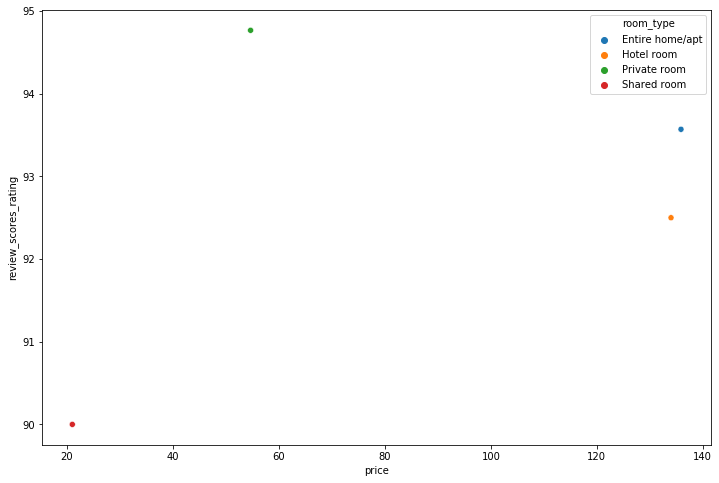

In [34]:
# plotting the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_mean.price, y=df_mean.review_scores_rating, hue=df_mean.room_type);

**Count host verification methods and find the most popular one for advertisements offering experiences**

In [16]:
# querying data from Clickhouse
query = """
SELECT
    DISTINCT(host_id),
    host_verifications
FROM default.ldn_listings
WHERE experiences_offered != 'none'
ORDER BY host_id
"""
df = ph.read_clickhouse(query, connection=connection)
df

,host_id,host_verifications
0,6821,"['email', 'phone', 'facebook', 'reviews', 'jum..."
1,11431,"['email', 'phone', 'facebook', 'reviews', 'jum..."
2,27929,"['email', 'phone', 'reviews', 'jumio', 'govern..."
3,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
4,54987,"['email', 'phone', 'google', 'reviews', 'manua..."
...,...,...
1356,33365279,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,33585883,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1358,33657365,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."


In [17]:
# changing host verification data type from a string to a list
df['host_verifications'] = df.host_verifications.str.strip('[') \
    .str.strip(']') \
    .str.replace("'", '') \
    .str.split(', ')

df

,host_id,host_verifications
0,6821,"[email, phone, facebook, reviews, jumio, gover..."
1,11431,"[email, phone, facebook, reviews, jumio, offli..."
2,27929,"[email, phone, reviews, jumio, government_id]"
3,54730,"[email, phone, facebook, reviews, offline_gove..."
4,54987,"[email, phone, google, reviews, manual_offline..."
...,...,...
1356,33365279,"[email, phone, reviews, jumio, government_id]"
1357,33585883,"[email, phone, reviews, jumio, government_id]"
1358,33657365,"[email, phone, reviews, jumio, government_id]"
1359,34219613,"[email, phone, reviews, jumio, government_id]"


In [18]:
# exploding host_verification column to count host_verification methods
df_unfolded = df.explode('host_verifications')

df_unfolded 

,host_id,host_verifications
0,6821,email
0,6821,phone
0,6821,facebook
0,6821,reviews
0,6821,jumio
...,...,...
1360,34299581,jumio
1360,34299581,offline_government_id
1360,34299581,selfie
1360,34299581,government_id


In [19]:
# counting host verification methods and finding the most popular one
df_unfolded.host_verifications.value_counts()

phone                    1361
email                    1345
reviews                  1309
government_id            1196
jumio                    1115
offline_government_id     469
work_email                279
facebook                  270
selfie                    252
identity_manual           227
manual_offline             70
google                     34
kba                        27
manual_online              16
sent_id                     6
Name: host_verifications, dtype: int64

**Group data by neighbourhood and experience offered type and count experience offered types**

In [20]:
# querying data from Clickhouse
query = """
SELECT
    id,
    neighbourhood_cleansed,
    experiences_offered
FROM default.ldn_listings
WHERE experiences_offered != 'none'
ORDER BY id
"""
df = ph.read_clickhouse(query, connection=connection)
df

,id,neighbourhood_cleansed,experiences_offered
0,13913,Islington,business
1,15400,Kensington and Chelsea,romantic
2,17506,Hammersmith and Fulham,business
3,38950,Haringey,business
4,41311,Barnet,business
...,...,...,...
1543,6550647,Croydon,family
1544,6551365,Islington,business
1545,6558281,Camden,business
1546,6559364,Islington,business


In [21]:
# counting experience offered
df_exp_count = df.groupby(['neighbourhood_cleansed', 'experiences_offered'], as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'experiences_count'})

df_exp_count

,neighbourhood_cleansed,experiences_offered,experiences_count
0,Barking and Dagenham,business,1
1,Barking and Dagenham,social,2
2,Barnet,business,7
3,Barnet,family,7
4,Barnet,romantic,3
...,...,...,...
108,Wandsworth,social,13
109,Westminster,business,50
110,Westminster,family,37
111,Westminster,romantic,23


In [22]:
# sorting data by experience count and finding the top-100 (most popular ones)
df_exp_count_100 = df_exp_count.sort_values('experiences_count', ascending=False) \
    .head(100)
df_exp_count_100

,neighbourhood_cleansed,experiences_offered,experiences_count
36,Hackney,family,61
98,Tower Hamlets,business,58
109,Westminster,business,50
38,Hackney,social,49
39,Hammersmith and Fulham,business,48
...,...,...,...
12,Bromley,family,2
30,Enfield,social,2
0,Barking and Dagenham,business,1
97,Sutton,romantic,1


In [23]:
# pivoting our data by neighbourhood to create a heatmap
exp_pivoted = df_exp_count_100.pivot(index='neighbourhood_cleansed',
                       columns='experiences_offered',
                       values='experiences_count')

exp_pivoted.head(5)

experiences_offered,business,family,romantic,social
neighbourhood_cleansed,,,,
Barking and Dagenham,1.0,NaN,NaN,2.0
Barnet,7.0,7.0,3.0,5.0
Brent,9.0,21.0,5.0,6.0
Bromley,3.0,2.0,NaN,4.0
Camden,36.0,30.0,19.0,25.0


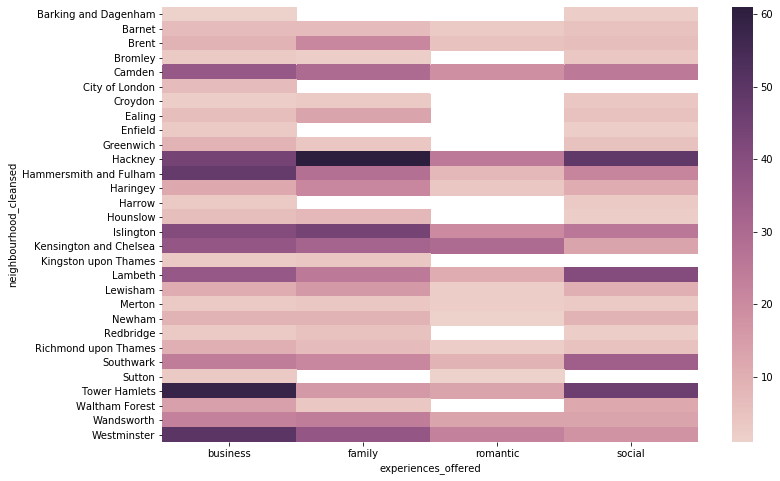

In [24]:
# creating a heatmap (neighbourhood vs experience_offered type)
plt.figure(figsize=(12, 8))
sns.heatmap(exp_pivoted, cmap=sns.cubehelix_palette(as_cmap=True));

**Plot price distribution for properties with experieces offered**

In [25]:
# querying data from Clickhouse
query = """
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price
FROM default.ldn_listings
WHERE experiences_offered != 'none'
ORDER BY id
"""
df = ph.read_clickhouse(query, connection=connection)
df

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
1543,Entire home/apt,100.0
1544,Entire home/apt,125.0
1545,Entire home/apt,185.0
1546,Entire home/apt,110.0


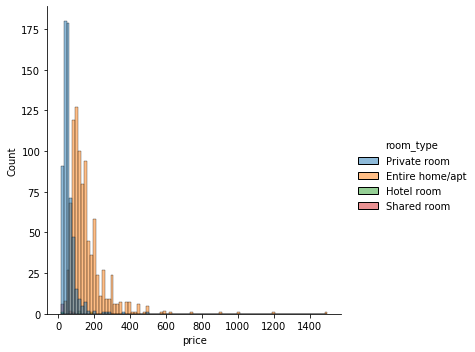

In [26]:
# plotting data
sns.displot(df, x='price', kde=False, hue='room_type');

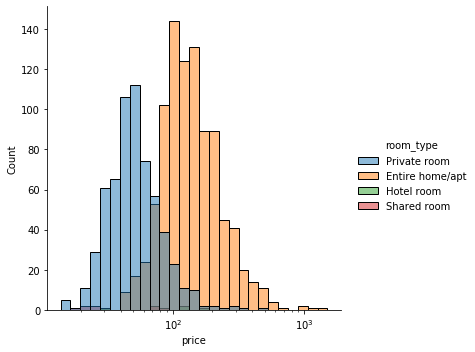

In [27]:
# plotting data in log scale
sns.displot(df, x='price', kde=False, hue='room_type', log_scale=True);

**Graph an average price variation for properties of different types starting from 2010-01-02**

In [28]:
# querying data from Clickhouse
query = """
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price,
    first_review
FROM default.ldn_listings
WHERE first_review > '2010-01-01'
LIMIT 1000
"""
df = ph.read_clickhouse(query, connection=connection)
df

,room_type,price,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [29]:
# 'resampling' to years
df = df.assign(year = df.first_review.apply(lambda x: x[0:4]))

df

,room_type,price,first_review,year
0,Private room,65.0,2010-08-18,2010
1,Entire home/apt,300.0,2011-03-21,2011
2,Entire home/apt,65.0,2016-03-05,2016
3,Private room,29.0,2010-04-14,2010
4,Private room,100.0,2010-10-16,2010
...,...,...,...,...
995,Private room,45.0,2012-11-07,2012
996,Private room,51.0,2013-03-18,2013
997,Entire home/apt,79.0,2012-09-17,2012
998,Entire home/apt,110.0,2012-09-24,2012


In [30]:
# calculating an average price
df_avg = df.groupby(['room_type', 'year'], as_index=False) \
    .agg({'price': 'mean'}) \
    .sort_values('year')

df_avg

,room_type,year,price
0,Entire home/apt,2010,103.500000
13,Private room,2010,56.428570
11,Hotel room,2010,88.000000
1,Entire home/apt,2011,128.792450
14,Private room,2011,52.607143
2,Entire home/apt,2012,135.467255
15,Private room,2012,53.269840
24,Shared room,2012,22.000000
3,Entire home/apt,2013,137.887634
16,Private room,2013,57.036587


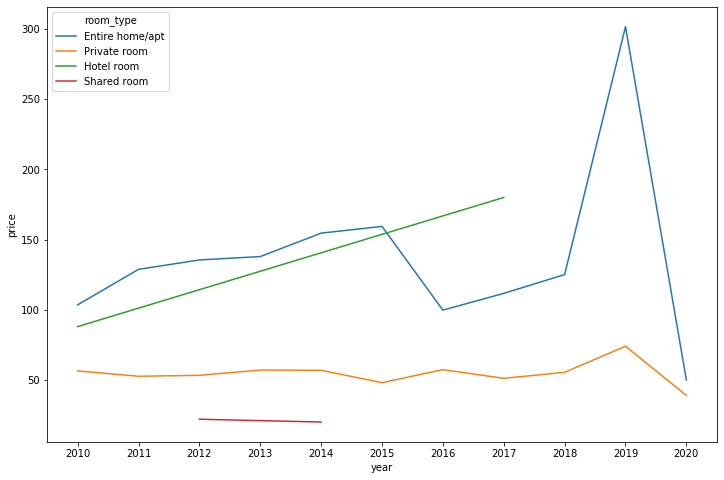

In [31]:
# graphing data
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_avg, x='year', y='price', hue='room_type');

In [32]:
# LESSON 7 -- Dashboards

In [ ]:
# Create a table for our retail data
CREATE TABLE test.retail (
    InvoiceNo stringMergeTree,
    StockCode stringMergeTree,
    Description stringMergeTree,
    Quantity Int32,
    InvoiceDate DateTime('Europe/London'),
    UnitPrice Decimal64(3),
    CustomerID uint32,
    Country stringMergeTree)
ENGINE = MergeTree
ORDER BY InvoiceDate, CustomerID

In [ ]:
# Check the number of unique customers by country
SELECT COUNT(DISTINCT CustomerID) AS uniq_customers,
       Country
FROM default.retail
GROUP BY Country

In [ ]:
# Check the change of MAU (monthly active users) in UK, Australia and Netherlands
SELECT COUNT(DISTINCT CustomerID) AS active_users,
       toStartOfMonth(InvoiceDate) AS MONTH,
       Country AS country
FROM default.retail
WHERE country IN ('United Kingdom',
                  'Australia',
                  'Netherlands')
GROUP BY MONTH,
         country
ORDER BY MONTH

In [ ]:
# Check the change of MAU (monthly active users) for all countries except UK
SELECT COUNT(DISTINCT CustomerID) AS active_users,
       toStartOfMonth(InvoiceDate) AS MONTH,
       Country AS country
FROM default.retail
WHERE country != 'United Kingdom'
GROUP BY MONTH,
         country
ORDER BY MONTH

In [ ]:
# Calculate AOV (average order value) for each country
SELECT AVG(order_value) AS AOV,
       Country
FROM
  (SELECT InvoiceNo,
          SUM(TotalPrice) AS order_value,
          Country
   FROM
     (SELECT InvoiceNo,
             Quantity * UnitPrice AS TotalPrice,
             Country
      FROM default.retail)
   GROUP BY InvoiceNo,
            Country
   ORDER BY order_value DESC)
GROUP BY Country
ORDER BY AOV DESC

In [ ]:
# Check the dynamics of AOV metrics for United Kingdom, Germany, France, Spain,
# Netherlands, Belgium, Switzerland, Portugal, Australia, USA
SELECT AVG(order_value) AS AOV,
       Country,
       MONTH
FROM
  (SELECT SUM(TotalPrice) AS order_value,
          MONTH,
          Country
   FROM
     (SELECT InvoiceNo,
             Quantity * UnitPrice AS TotalPrice,
             Country,
             toStartOfMonth(InvoiceDate) AS MONTH
      FROM default.retail
      WHERE Country IN ('United Kingdom',
                        'Germany',
                        'France',
                        'Spain',
                        'Netherlands',
                        'Belgium',
                        'Switzerland',
                        'Portugal',
                        'Australia',
                        'USA') )
   GROUP BY InvoiceNo,
            Country,
            MONTH
   ORDER BY MONTH ASC, order_value DESC)
GROUP BY MONTH,
         Country
ORDER BY MONTH ASC, AOV DESC

In [ ]:
# Calculate an average number of items per order by country
SELECT AVG(quantity_per_invoice) AS average_items,
       Country
FROM
  (SELECT InvoiceNo,
          SUM(Quantity) AS quantity_per_invoice,
          Country
   FROM default.retail
   GROUP BY InvoiceNo,
            Country)
GROUP BY Country
ORDER BY average_items DESC

In [ ]:
# Investigate customers from the Netherlands. 
# Find a customer who has bought the biggest number of items
SELECT
    SUM(Quantity) AS overall_quantity,
    CustomerID
FROM default.retail
WHERE Country == 'Netherlands'
GROUP BY CustomerID
ORDER BY overall_quantity DESC
LIMIT 100

In [ ]:
# Calculate revenue deistribution per country
SELECT
    Country,
    --UnitPrice, 
    --Quantity,
    SUM(UnitPrice * Quantity) AS total_revenue
FROM default.retail
GROUP BY Country
ORDER BY total_revenue DESC

In [ ]:
# Calculate monthly revenue dynamics for UK
SELECT
    toStartOfMonth(InvoiceDate) AS month,
    SUM(UnitPrice * Quantity) AS monthly_reveue
FROM default.retail
WHERE Country == 'United Kingdom'
    AND month < '2011-12-01'
GROUP BY month
ORDER BY month ASC
LIMIT 100

In [ ]:
# Find the top-10 sales value items in UK in November
SELECT
    Description,
    SUM(Quantity) AS items_sold,
    UnitPrice,
    items_sold * UnitPrice AS total_sales_revenue
FROM default.retail
WHERE (toStartOfMonth(InvoiceDate) == '2011-11-01')
    AND Country == 'United Kingdom'
GROUP BY Description, UnitPrice
ORDER BY total_sales_revenue DESC
LIMIT 10

In [ ]:
# LESSON 8 -- Window Functions

In [ ]:
# PostgreSQL via Redash was used for making queries.

In [ ]:
# Find accumulative volume of organic avocado sold in New York and Los Angeles. 
# Sort the results by date in ascedning order.
SELECT 
  region, 
  date, 
  total_volume, 
  SUM(total_volume) OVER w AS volume 
FROM 
  avocado 
WHERE 
  region IN ('NewYork', 'LosAngeles') 
  AND type = 'organic' 
GROUP BY 
  region, 
  date, 
  total_volume WINDOW w AS (
    PARTITION BY region 
    ORDER BY 
      date ASC
  ) 
ORDER BY 
  region DESC, 
  date ASC

In [ ]:
# Find accumulative volume of organic avocado sold in New York and Los Angeles year by year. 
# Sort the results by date in ascedning order.
SELECT 
  region, 
  date, 
  year, 
  total_volume, 
  SUM(total_volume) OVER w AS volume 
FROM 
  avocado 
WHERE 
  region IN ('NewYork', 'LosAngeles') 
  AND type = 'organic' 
GROUP BY 
  region, 
  date, 
  year, 
  total_volume WINDOW w AS (
    PARTITION BY region, 
    year 
    ORDER BY 
      date ASC
  ) 
ORDER BY 
  region DESC, 
  date ASC

In [ ]:
# Find the weekly difference in total volume for conventional avocado sold in US.
# Sort the results by date in ascedning order.
SELECT 
  date, 
  total_volume, 
  region, 
  type, 
  total_volume - lag(total_volume, 1) OVER w AS week_diff 
FROM 
  avocado 
WHERE 
  region = 'TotalUS' 
  AND type = 'conventional' 
GROUP BY 
  date, 
  region, 
  type, 
  total_volume WINDOW w AS (
    ORDER BY 
      date ASC
  ) 
ORDER BY 
  date ASC

In [ ]:
# Find the weekly difference in total volume avocado sold in New York in 2018. 
# Comapre the results for organic and conventional avocado types.
SELECT 
  date, 
  total_volume, 
  type, 
  total_volume - lag(total_volume, 1) OVER w AS week_diff 
FROM 
  avocado 
WHERE 
  region = 'NewYork' 
  AND year = 2018 
GROUP BY 
  date, 
  type, 
  total_volume WINDOW w AS (
    PARTITION BY type 
    ORDER BY 
      date ASC
  ) 
ORDER BY 
  type ASC, 
  date ASC

In [ ]:
# Calculate the rolling average price (window=2) for conventional avocado in New York.
SELECT 
  date, 
  average_price, 
  region, 
  type, 
  AVG(average_price) OVER w AS rolling_price 
FROM 
  avocado 
WHERE 
  region = 'NewYork' 
  AND type = 'conventional' 
GROUP BY 
  date, 
  region, 
  type, 
  average_price WINDOW w AS (
    ORDER BY 
      date ASC ROWS BETWEEN 2 PRECEDING 
      AND 0 FOLLOWING
  ) 
ORDER BY 
  type ASC, 
  date ASC

In [ ]:
# LESSON 9

In [ ]:
tbc..